<a href="https://colab.research.google.com/github/jardunn/gpxAnalysis/blob/master/DS4I_A2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
devtools::install_github("rstudio/keras")
devtools::install_github("rstudio/reticulate")
install.packages("tensorflow")

install.packages("caret")
install.packages("dataPreparation")

reticulate (NA    -> 7174f7456...) [GitHub]
magrittr   (1.5   -> 2.0.1       ) [CRAN]
vctrs      (0.3.4 -> 0.3.5       ) [CRAN]
rappdirs   (NA    -> 0.3.1       ) [CRAN]
rstudioapi (0.12  -> 0.13        ) [CRAN]
config     (NA    -> 0.3         ) [CRAN]
tfruns     (NA    -> 1.4         ) [CRAN]
zeallot    (NA    -> 0.1.0       ) [CRAN]
tensorflow (NA    -> 2.2.0       ) [CRAN]


rappdirs (NA -> 0.3.1) [CRAN]


Installing 1 packages: rappdirs

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



✔  checking for file ‘/tmp/RtmpRCqoJe/remotes3740a352ca/rstudio-reticulate-7174f74/DESCRIPTION’
─  preparing ‘reticulate’:
✔  checking DESCRIPTION meta-information
─  cleaning src
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  building ‘reticulate_1.18-9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing 8 packages: magrittr, vctrs, rappdirs, rstudioapi, config, tfruns, zeallot, tensorflow

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'reticulate' from a github remote, the SHA1 (7174f745) has not changed since last install.
  Use `force = TRUE` to force installation



✔  checking for file ‘/tmp/RtmpRCqoJe/remotes3762239ec9/rstudio-keras-aaddf0e/DESCRIPTION’
─  preparing ‘keras’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts (487ms)
─  checking for empty or unneeded directories
   Removed empty directory ‘keras/man-roxygen’
─  building ‘keras_2.3.0.0.9000.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Skipping install of 'reticulate' from a github remote, the SHA1 (7174f745) has not changed since last install.
  Use `force = TRUE` to force installation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(keras)
library(dplyr)
library(tidyverse)
library(ggplot2)
library(caret)
library(dataPreparation)
library(tidyverse)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ stringr 1.4.0
✔ tidyr   1.1.2     ✔ forcats 0.5.0
✔ readr   1.4.0     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Loading required package: lubridate


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, p

In [3]:
# Read in data
data <- read.csv(url("https://protect-za.mimecast.com/s/vYKICAnX51iR2wOPiM4hPa"), header = TRUE) 
summary(data)

      var1             var2            var3            var4      
 Min.   : 204.0   Min.   :  0.0   Min.   :  0.0   Min.   :243.5  
 1st Qu.: 384.8   1st Qu.:  0.0   1st Qu.:  0.0   1st Qu.:329.8  
 Median : 545.8   Median : 44.0   Median :  0.0   Median :370.0  
 Mean   : 562.3   Mean   :147.8   Mean   :108.4   Mean   :363.1  
 3rd Qu.: 700.0   3rd Qu.:285.9   3rd Qu.:236.5   3rd Qu.:384.0  
 Max.   :1080.0   Max.   :718.8   Max.   :400.2   Max.   :494.0  
      var5            var6           var7           var8            target     
 Min.   : 0.00   Min.   :1602   Min.   :1188   Min.   :  2.00   Min.   : 2.33  
 1st Qu.: 0.00   1st Qu.:1864   1st Qu.:1462   1st Qu.: 14.00   1st Qu.:23.71  
 Median :12.70   Median :1936   Median :1559   Median : 56.00   Median :34.45  
 Mean   :12.41   Mean   :1946   Mean   :1547   Mean   : 91.32   Mean   :35.82  
 3rd Qu.:20.32   3rd Qu.:2059   3rd Qu.:1648   3rd Qu.:112.00   3rd Qu.:46.13  
 Max.   :64.40   Max.   :2290   Max.   :1985   Max.   :730

[1] 1030    9

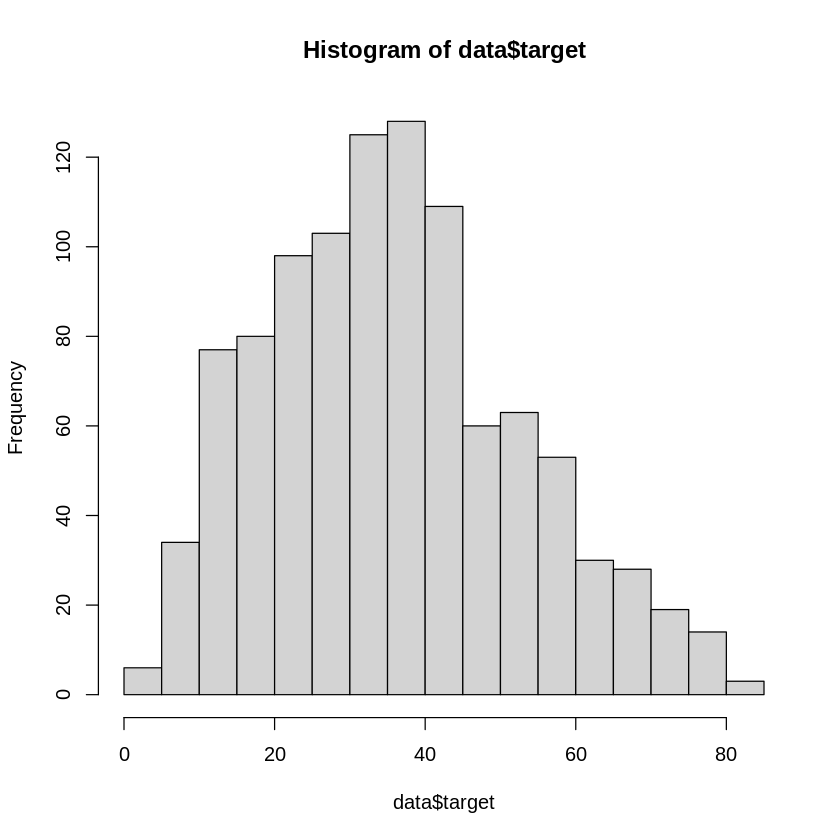

In [39]:
dim(data)
hist(data$target)

In [14]:
# Split into training and testing
#data <- as.matrix(data)
set.seed(12)
training_indicies <- sample(1:nrow(data), size= as.integer(0.8 * nrow(data)), replace=FALSE)
train_data <- data[training_indicies, ]
test_data <- data[-training_indicies, ]

# Split into features and labels
n <- ncol(train_data)
x_train <- train_data[, -n]
y_train <- as.matrix(train_data[, n])

x_test <- test_data[, -n]
y_test <- as.matrix(test_data[, n])

# Scale features
scales <- build_scales(x_train, cols="auto")
x_train <- fast_scale(x_train, scales = scales)
x_test <- fast_scale(x_test, scales = scales)




[1] "build_scales: I will compute scale on  8 numeric columns."
[1] "build_scales: it took me: 0s to compute scale for 8 numeric columns."
[1] "fast_scale: I will scale 8 numeric columns."
[1] "fast_scale: it took me: 0s to scale 8 numeric columns."
[1] "fast_scale: I will scale 8 numeric columns."
[1] "fast_scale: it took me: 0s to scale 8 numeric columns."


In [ ]:
# EDA
summary(x_train)

      var1              var2              var3              var4        
 Min.   :-1.6920   Min.   :-0.8418   Min.   :-0.8462   Min.   :-2.8156  
 1st Qu.:-0.8521   1st Qu.:-0.8418   1st Qu.:-0.8462   1st Qu.:-0.7784  
 Median :-0.1066   Median :-0.6117   Median :-0.8462   Median : 0.1705  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000  
 3rd Qu.: 0.6568   3rd Qu.: 0.7978   3rd Qu.: 0.9946   3rd Qu.: 0.5010  
 Max.   : 2.4563   Max.   : 3.2933   Max.   : 2.2683   Max.   : 3.0977  
      var5                var6               var7               var8        
 Min.   :-1.019734   Min.   :-2.16949   Min.   :-2.24097   Min.   :-0.7118  
 1st Qu.:-1.019734   1st Qu.:-0.51621   1st Qu.:-0.51387   1st Qu.:-0.5093  
 Median :-0.008813   Median :-0.06187   Median : 0.05129   Median :-0.2911  
 Mean   : 0.000000   Mean   : 0.00000   Mean   : 0.00000   Mean   : 0.0000  
 3rd Qu.: 0.633526   3rd Qu.: 0.73953   3rd Qu.: 0.64267   3rd Qu.: 0.1453  
 Max.   : 4.290488   Max.  

In [15]:
# Test dimensions
dim(train_data)
dim(test_data)
dim(x_train)
dim(y_train)
dim(x_test)
dim(y_test)

[1] 824   9

[1] 206   9

[1] 824   8

[1] 824   1

[1] 206   8

[1] 206   1

In [72]:
# Build Model
# Create model
model <- keras_model_sequential() 
model %>% 
    layer_dense(units = 32, input_shape = c(8)) %>%
    #layer_dense(units = 16, activation="relu") %>%
    layer_dense(units = 1, activation='relu')

# Complile Model
model %>% 
  compile(
    loss = "mse",
    optimizer = 'adam',
    metrics = list("mean_absolute_error")
  )

summary(model)

Model: "sequential_2"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_4 (Dense)                     (None, 32)                      288         
________________________________________________________________________________
dense_5 (Dense)                     (None, 1)                       33          
Total params: 321
Trainable params: 321
Non-trainable params: 0
________________________________________________________________________________


`geom_smooth()` using formula 'y ~ x'



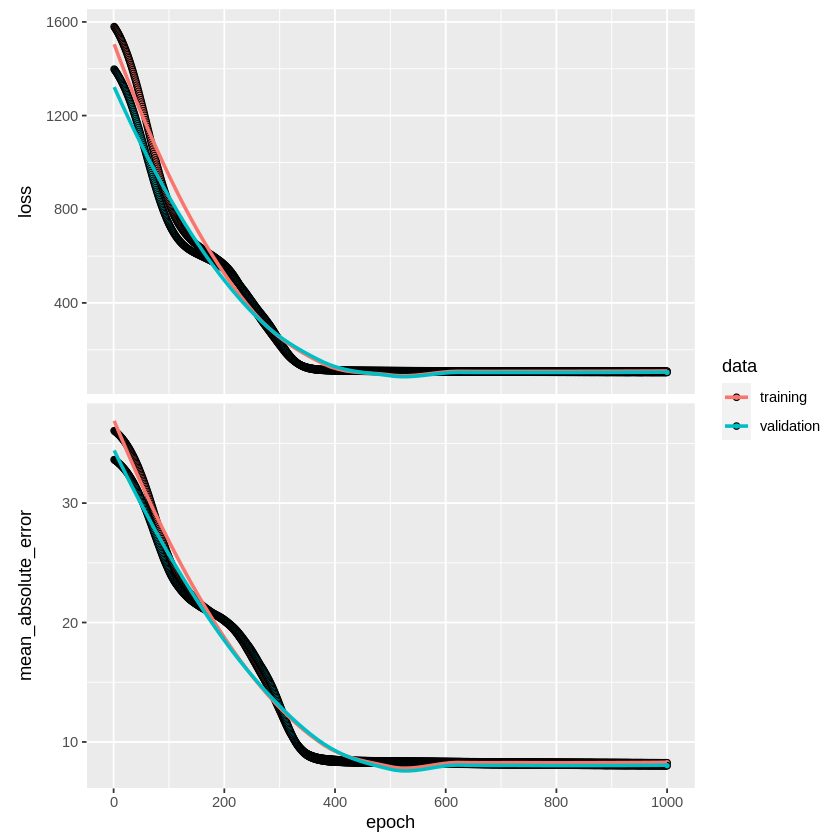

In [73]:
# Fit model
# Stop if no change
early_stop <- callback_early_stopping(monitor = "val_loss", patience = 100)

#model <- build_model()
x_train <- as.matrix(x_train)

set.seed(1)
history <- model %>% fit(
  x = x_train,
  y = y_train,
  epochs = 1000,
  verbose = 0,
  validation_split=0.3,
  batch = 200,
  shuffle = TRUE,
  callbacks = list(early_stop)
)
plot(history)

In [74]:
# Set seed for Keras
use_session_with_seed(10)

# Generate folds
x_train <- as.matrix(x_train)

set.seed(10)
folds <- sample(1:10, size=nrow(x_train), replace=TRUE)
histories <- list()
for (fold in 1:10){
  # Subset into folds
  print(max(folds[[fold]]))
  x_train_cv <- x_train[folds!=fold, ]
  x_valid_cv <- x_train[folds==fold, ]
  y_train_cv <- y_train[folds!=fold, ]
  y_valid_cv <- y_train[folds==fold,]

  set.seed(1)
  history <- model %>% fit(
    x = x_train_cv,
    y = y_train_cv,
    epochs = 500,
    verbose = 0,
    validation_data = list(x_valid_cv, y_valid_cv),
    batch = 200,
    shuffle = TRUE,
    callbacks = list(early_stop)
  )
  histories[[fold]] <- history
}

Set session seed to 10 (disabled GPU, CPU parallelism)



[1] 9
[1] 10
[1] 7
[1] 8
[1] 6
[1] 7
[1] 3
[1] 8
[1] 10
[1] 7


In [35]:
table(folds)

folds
  1   2   3   4   5   6   7   8   9  10 
 82  77  81  81  88  73  78  86  77 101 

[1] 8.223693
[1] 109.4038


`geom_smooth()` using formula 'y ~ x'



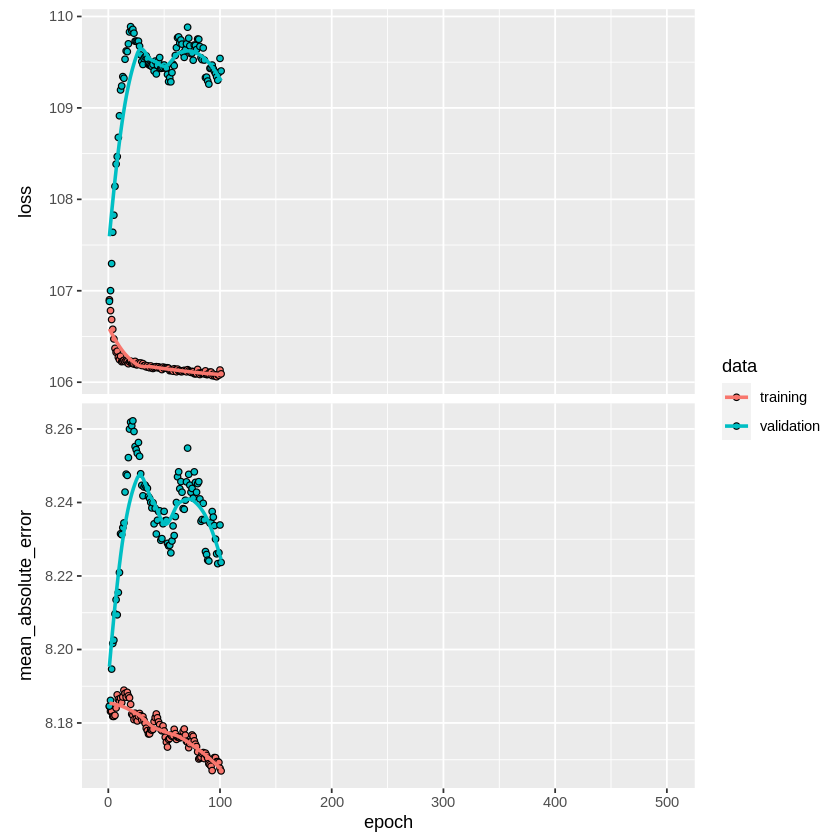

In [75]:
# Calculate average loss and MAE
mae <- 0
loss <-  0
for ( i in 1:10){
  loss <- loss + tail(histories[[1]]$metrics$val_loss, n=1)
  mae <- mae + tail(histories[[1]]$metrics$val_mean_absolute_error, n=1)
}
print(mae/10)
print(loss/10)

for (i in 1:10){plot(histories[[i]])}
plot(histories[[1]])

In [31]:
str(histories[[1]])

List of 2
 $ params :List of 3
  ..$ verbose: int 0
  ..$ epochs : int 150
  ..$ steps  : int 2
 $ metrics:List of 4
  ..$ loss                   : num [1:150] 106 106 106 106 106 ...
  ..$ mean_absolute_error    : num [1:150] 8.17 8.17 8.17 8.17 8.17 ...
  ..$ val_loss               : num [1:150] 107 107 107 107 107 ...
  ..$ val_mean_absolute_error: num [1:150] 8.16 8.16 8.16 8.16 8.16 ...
 - attr(*, "class")= chr "keras_training_history"



Final epoch (plot to see history):
                   loss: 105.5
    mean_absolute_error: 8.141
               val_loss: 110.9
val_mean_absolute_error: 8.131 

epoch,mae,mae_val,loss,loss_val
1,35.90488,34.52891,1595.830,1486.736
2,35.88223,34.51370,1592.457,1484.211
3,35.85837,34.49850,1588.995,1481.758
4,35.83692,34.48344,1585.874,1479.311
5,35.81484,34.46816,1582.613,1476.876
6,35.79288,34.45331,1579.441,1474.485


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



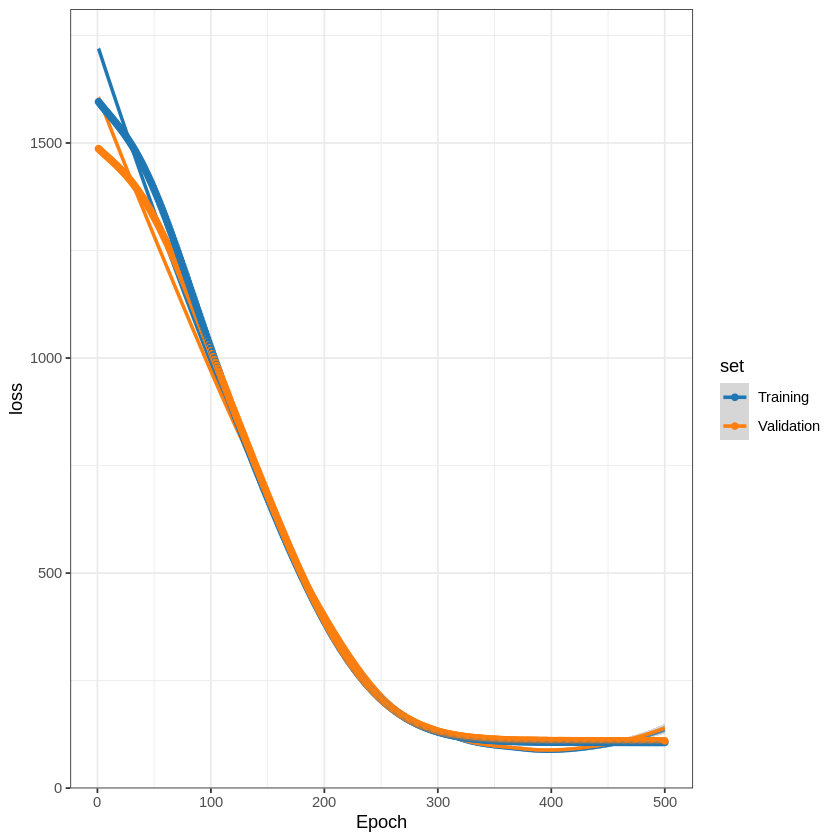

`geom_smooth()` using formula 'y ~ x'



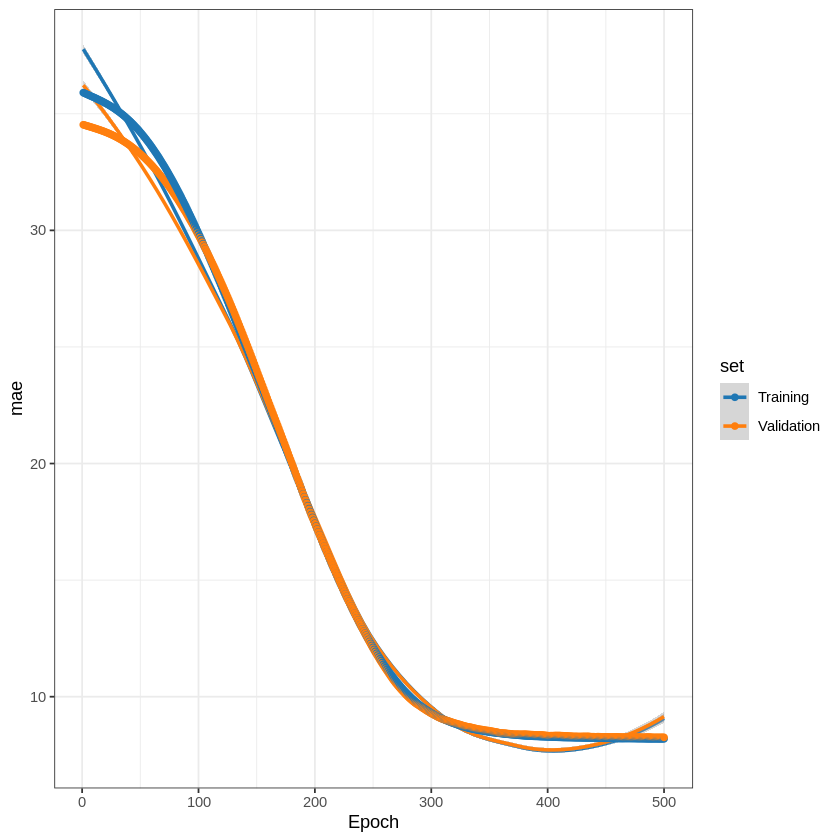

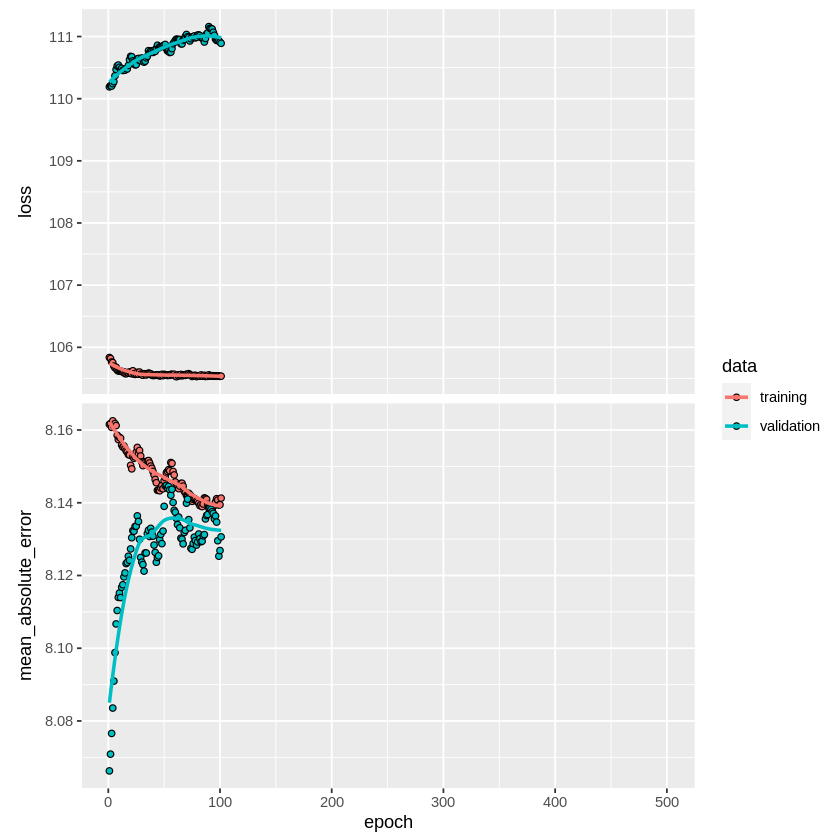

In [62]:
# PLot history

history
plot_mae_history <- function(df){
  colours <- c("#1F77B4", "#FF7F0E")
  hist_df <- cbind(epoch=1:length(df$metrics$mean_absolute_error), as.data.frame(df$metrics)) %>%
  select(c(epoch, mean_absolute_error, val_mean_absolute_error)) %>%
  pivot_longer(cols=2:3, names_to="set", values_to="error")

  ggplot(hist_df, aes(x=epoch, y=error, colour=set)) +
    geom_smooth() +
    geom_point() +
    scale_colour_manual(values=colours, labels=c("Training", "Validation")) +
    labs(x="Epoch", y="Mean Absolute Error", main="Training vs Validation Error") +
    theme_bw()
}

aggregate_cv <- function(results){
  agg_res <- cbind(epoch=1:length(results[[1]]$metrics$mean_absolute_error), 
    mae=results[[1]]$metrics$mean_absolute_error,
    mae_val=results[[1]]$metrics$val_mean_absolute_error,
    loss=results[[1]]$metrics$loss,
    loss_val=results[[1]]$metrics$val_loss
  )
  
}

aggregate_plot <- function(results, metric){
  colours <- c("#1F77B4", "#FF7F0E")

  results <- as.data.frame(results) %>%
    select(epoch, contains(metric)) %>%
    pivot_longer(cols=2:3, names_to="set", values_to="error")

  ggplot(results, aes(x=epoch, y=error, colour=set)) +
    geom_smooth() +
    geom_point() +
    scale_colour_manual(values=colours, labels=c("Training", "Validation")) +
    labs(x="Epoch", y=metric, main="Training vs Validation Error") +
    theme_bw()
}

agg_hist <- aggregate_cv(histories)
head(agg_hist)
aggregate_plot(agg_hist, "loss")
aggregate_plot(agg_hist, "mae")
#plot_mae_history(history)
plot(history)

,epoch,mae,valid_mae,loss,valid_loss
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,35.83977,34.56328,1562.500,1464.440
2,2,35.69725,34.47527,1544.267,1451.472
3,3,35.52950,34.37266,1523.603,1436.889
4,4,35.32149,34.24184,1498.869,1419.191
5,5,35.06277,34.07095,1469.018,1397.205
6,6,34.74173,33.85180,1433.347,1370.380


`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



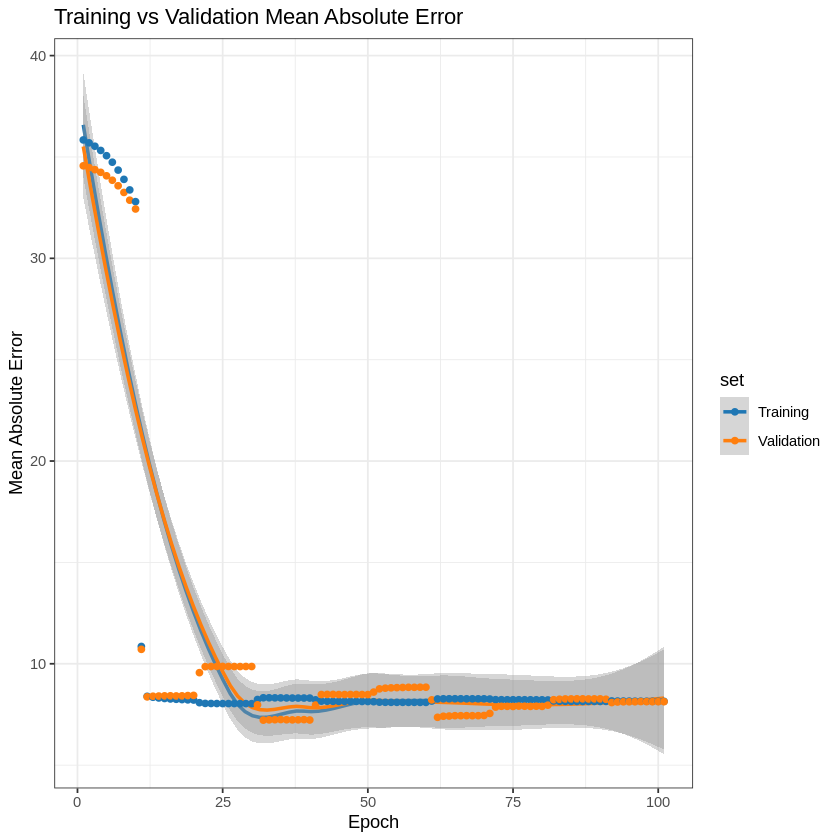

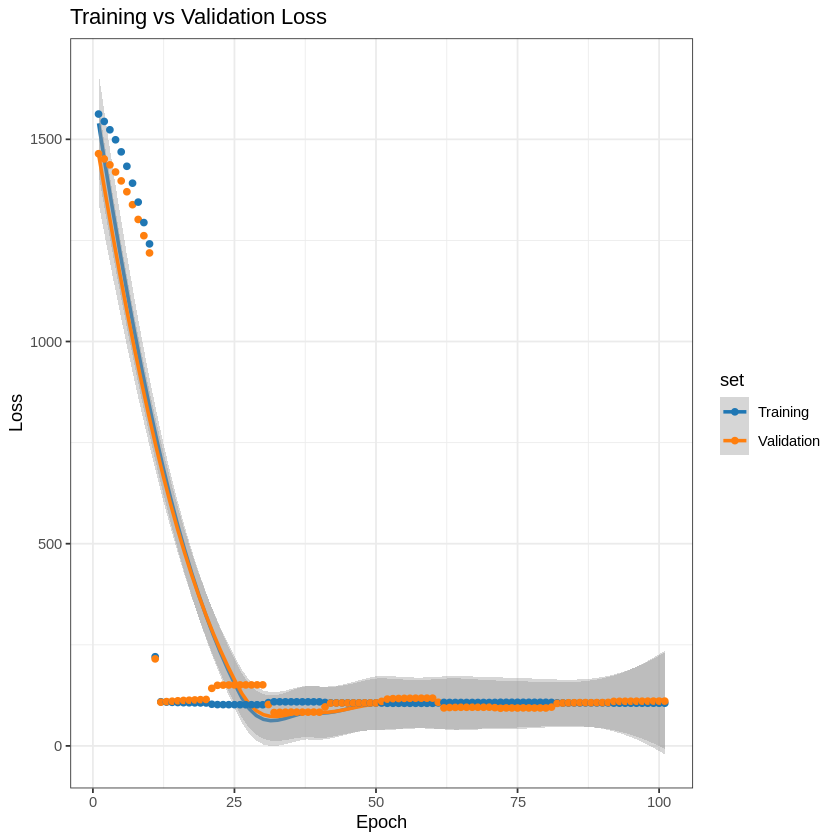

In [68]:
plot_mae_df_history <- function(hist_df){
  colours <- c("#1F77B4", "#FF7F0E")
  

  ggplot(hist_df, aes(x=epoch, y=error, colour=set)) +
    geom_smooth() +
    geom_point() +
    scale_colour_manual(values=colours, labels=c("Training", "Validation")) +
    labs(x="Epoch", y="Mean Absolute Error", main="Training vs Validation Error") +
    ggtitle("Training vs Validation Mean Absolute Error") +
    theme_bw()
}

plot_loss_df_history <- function(hist_df){
  colours <- c("#1F77B4", "#FF7F0E")
  

  ggplot(hist_df, aes(x=epoch, y=error, colour=set)) +
    geom_smooth() +
    geom_point() +
    scale_colour_manual(values=colours, labels=c("Training", "Validation")) +
    labs(x="Epoch", y="Loss", main="Training vs Validation Error") +
    ggtitle("Training vs Validation Loss") +
    theme_bw()
}

min_mae_length <- min(unlist(lapply(histories, function(hist) length(hist$metrics$mean_absolute_error))))
min_loss_length <- min(unlist(lapply(histories, function(hist) length(hist$metrics$loss))))
avg_mae <- colMeans(matrix(unlist(lapply(histories, function(hist) hist$metrics$mean_absolute_error[1:min_mae_length])), nrow=10))
avg_valid_mae <- colMeans(matrix(unlist(lapply(histories, function(hist) hist$metrics$val_mean_absolute_error[1:min_mae_length])), nrow=10))
avg_loss <- colMeans(matrix(unlist(lapply(histories, function(hist) hist$metrics$loss[1:min_loss_length])), nrow=10))
avg_valid_loss <- colMeans(matrix(unlist(lapply(histories, function(hist) hist$metrics$val_loss[1:min_loss_length])), nrow=10))

hist_df <- data.frame(epoch=1:length(avg_mae), mae=avg_mae, 
  valid_mae=avg_valid_mae, loss=avg_loss, valid_loss=avg_valid_loss)
head(hist_df)

avg_mae_df <- hist_df %>% 
  select(c(epoch, mae, valid_mae)) %>%
  pivot_longer(cols=2:3, names_to="set", values_to="error")

avg_loss_df <- hist_df %>% 
  select(c(epoch, loss, valid_loss)) %>%
  pivot_longer(cols=2:3, names_to="set", values_to="error")

plot_mae_df_history(avg_mae_df)
plot_loss_df_history(avg_loss_df)

In [70]:
# Evaluate Test Data
x_test <- as.matrix(x_test)
c(loss, mae) %<-% (model %>% evaluate(x_test, y_test, verbose = 0))

paste0("Mean Absolute Error on test set: ", sprintf("%.5f", mae))



[1] "Mean Absolute Error on test set: 35.61660"